<a href="https://colab.research.google.com/github/Informathiques/2024-Autumn-Cluj-Napoca/blob/main/Day3Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting the data from the internet
## Opendata


*   https://www.data.gouv.fr/fr/
*   https://data.gov.ro/
*   https://ec.europa.eu/eurostat





## Webservices
  Meteo https://openweathermap.org
  



In [ ]:
# Import necessary libraries
import requests
import pandas as pd

# Define the API key and base URL
API_KEY = 'eaad329271adc36b53c4ec13b9070728'
BASE_URL = 'https://api.openweathermap.org/data/2.5/weather'

# Define the latitude and longitude for the desired location
lat = 46.77  # Example: Cluj-Napoca, Romania
lon = 23.6   # Example: Cluj-Napoca, Romania

# Construct the API request URL
url = f"{BASE_URL}?lat={lat}&lon={lon}&appid={API_KEY}"

# Make the GET request to the OpenWeatherMap API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the response JSON data
    weather_data = response.json()

    # Print the weather data
    print("Weather data for the location:")
    print(weather_data)
else:
    # Print an error message if the request was unsuccessful
    print(f"Error: Unable to fetch data (Status code: {response.status_code})")


Weather data for the location:
{'coord': {'lon': 23.6, 'lat': 46.77}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 279.94, 'feels_like': 279.94, 'temp_min': 279.94, 'temp_max': 279.94, 'pressure': 1032, 'humidity': 81, 'sea_level': 1032, 'grnd_level': 974}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1729673570, 'sys': {'type': 1, 'id': 6913, 'country': 'RO', 'sunrise': 1729659289, 'sunset': 1729697080}, 'timezone': 10800, 'id': 681290, 'name': 'Cluj-Napoca', 'cod': 200}


In [ ]:
# Extract relevant fields from the JSON response
main_data = weather_data['main']  # Temperature, humidity, pressure
weather_description = weather_data['weather'][0]['description']  # Description of weather
wind_data = weather_data['wind']  # Wind speed and direction

# Convert temperatures from Kelvin to Celsius
temp_celsius = main_data['temp'] - 273.15
feels_like_celsius = main_data['feels_like'] - 273.15

# Create a dictionary to hold the parsed data
data = {
        'Temperature (°C)': [temp_celsius],
        'Feels Like (°C)': [feels_like_celsius],
        'Humidity (%)': [main_data['humidity']],
        'Pressure (hPa)': [main_data['pressure']],
        'Weather Description': [weather_description],
        'Wind Speed (m/s)': [wind_data['speed']],
        'Wind Direction (deg)': [wind_data.get('deg', 'N/A')]
    }

# Convert the dictionary into a pandas DataFrame
weather_df = pd.DataFrame(data)

# Display the DataFrame using pandas built-in methods
print(weather_df)


   Temperature (°C)  Feels Like (°C)  Humidity (%)  Pressure (hPa)  \
0              6.79             6.79            81            1032   

  Weather Description  Wind Speed (m/s)  Wind Direction (deg)  
0       broken clouds              1.03                   100  


OpenStreetMap (OSM) (https://www.openstreetmap.org)

In [ ]:
# @title
!pip install osmnx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


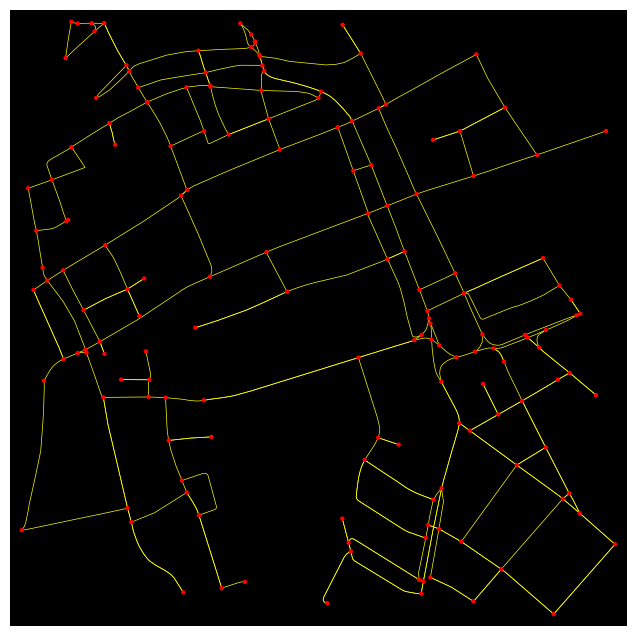

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

# Coordinates of Cluj-Napoca city center
center_point = (46.7681, 23.5943)  # Latitude, Longitude of Cluj-Napoca center

# Set the distance (e.g., 2000 meters around the center)
distance = 750  # in meters

# Fetch the street network within the specified distance from the center point
G = ox.graph_from_point(center_point, dist=distance, network_type='drive')

# Plot the street network
fig, ax = ox.plot_graph(G, bgcolor='k', node_color='red', edge_color='yellow', edge_linewidth=0.5, node_size=10)


# Add a special marker at the center point (red star)
ax.scatter(center_point[1], center_point[0], c='red', marker='o', s=200, label='City Center')


# Show the plot
plt.show()

# Randomness

Importing the library


In [ ]:
import random

some features

In [ ]:
random.randint(1, 10)

4

In [ ]:
random.random()

0.2976368717341832

Seed

In [ ]:
random.seed(42)  # Set the seed
random.randint(1, 10)

2

In [ ]:
colors = ['red', 'blue', 'green']
random.choice(colors)

'red'

Add the second random walk on the plot below

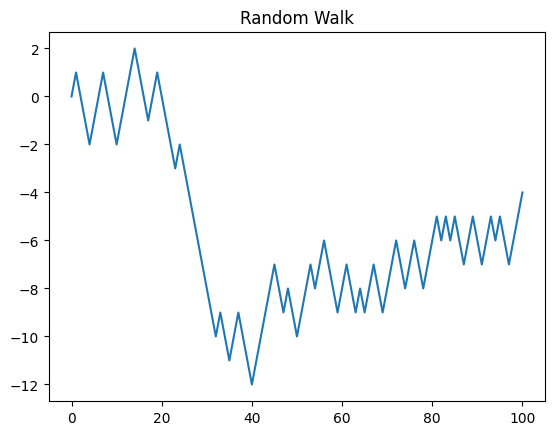

In [ ]:
import matplotlib.pyplot as plt

position = 0
walk = [position]

for _ in range(100):
    step = 1 if random.random() > 0.5 else -1
    position += step
    walk.append(position)

plt.plot(walk)

plt.title("Random Walk")
plt.show()


Distribution

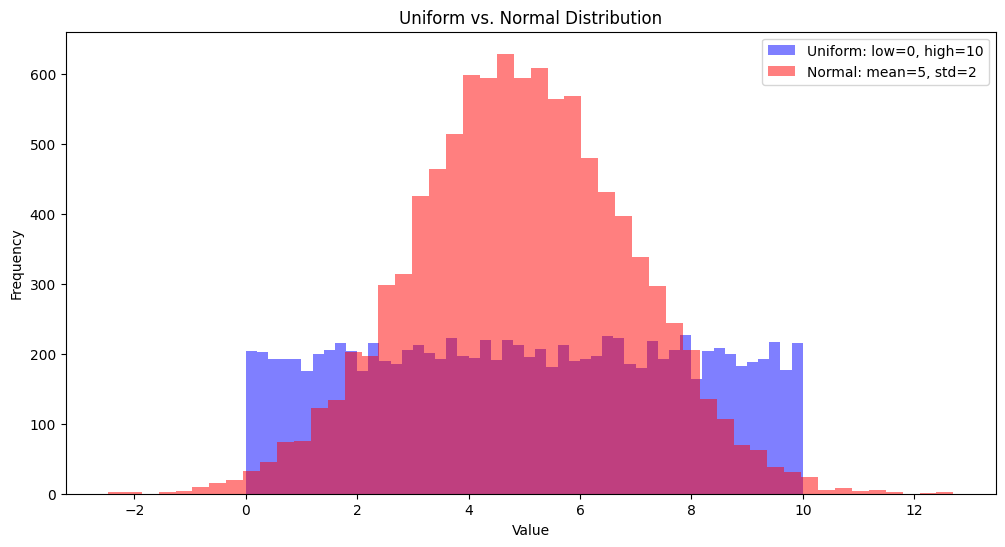

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the distributions
n = 10000  # Number of samples
uniform_low, uniform_high = 0, 10  # Uniform distribution parameters
normal_mean, normal_std = 5, 2     # Normal distribution parameters

# Generate random data
uniform_data = np.random.uniform(uniform_low, uniform_high, n)
normal_data = np.random.normal(normal_mean, normal_std, n)

# Plot the distributions
plt.figure(figsize=(12, 6))
plt.hist(uniform_data, bins=50, alpha=0.5, label=f'Uniform: low={uniform_low}, high={uniform_high}', color='blue')
plt.hist(normal_data, bins=50, alpha=0.5, label=f'Normal: mean={normal_mean}, std={normal_std}', color='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Uniform vs. Normal Distribution')
plt.legend()
plt.show()